# CIFAR-10 데이터셋 설명
- 60000개의 칼라 사진 (32x32x3)
- 종속변수 10개 
  - 각 class 별로 6000개 이미지
  - airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck 

합성곱 신경망 쌓기 - 함수 

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import optimizers

In [3]:
def build(input_shape, classes):
  model=Sequential()
  model.add(Conv2D(32, (3,3), activation='relu',
                          input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(classes, activation='softmax'))
  return model

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


독립변수(색상정보) 정규화 및
종속변수 원핫 인코딩

In [5]:
X_train, X_test = X_train/255.0, X_test/255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [6]:
X_train.shape # 학습데이터 5만장 

(50000, 32, 32, 3)

In [7]:
X_test.shape # 평가데이터 1만장

(10000, 32, 32, 3)

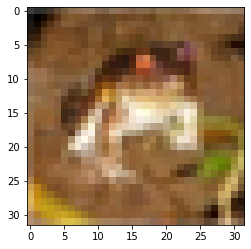

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [9]:
model=build((32,32,3), 10) # 3차원 이미지 shape, 클래스 개수
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 512)               3686912   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                        

In [25]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(), metrics=['accuracy'])
history=model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 3s 9ms/step - loss: 0.8034 - accuracy: 0.7212 - val_loss: 1.0686 - val_accuracy: 0.6439
Epoch 2/10
313/313 [==============================] - 2s 8ms/step - loss: 0.7592 - accuracy: 0.7372 - val_loss: 1.0421 - val_accuracy: 0.6506
Epoch 3/10
313/313 [==============================] - 3s 8ms/step - loss: 0.7224 - accuracy: 0.7494 - val_loss: 1.0589 - val_accuracy: 0.6538
Epoch 4/10
313/313 [==============================] - 3s 10ms/step - loss: 0.6972 - accuracy: 0.7566 - val_loss: 0.9928 - val_accuracy: 0.6783
Epoch 5/10
313/313 [==============================] - 2s 8ms/step - loss: 0.6624 - accuracy: 0.7732 - val_loss: 1.0751 - val_accuracy: 0.6646
Epoch 6/10
313/313 [==============================] - 2s 8ms/step - loss: 0.6412 - accuracy: 0.7805 - val_loss: 1.0786 - val_accuracy: 0.6685
Epoch 7/10
313/313 [==============================] - 2s 8ms/step - loss: 0.6107 - accuracy: 0.7911 - val_loss: 1.0331 - val_accuracy: 0.6651
Epoch

In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

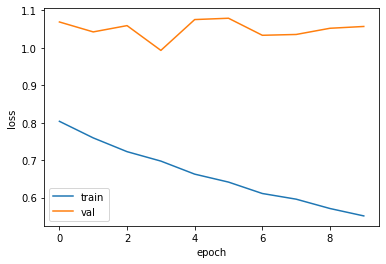

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

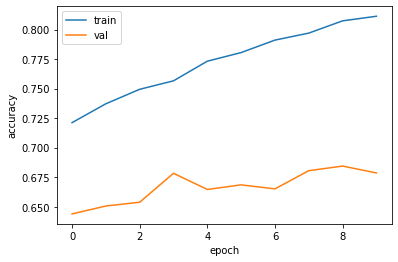

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [29]:
score=model.evaluate(X_test, y_test)
print('\nTest loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 1.0687 - accuracy: 0.6715

Test loss: 1.0686806440353394
Test accuracy: 0.671500027179718


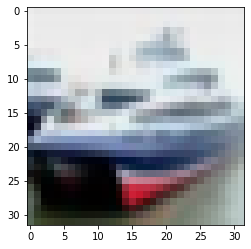

In [30]:
plt.imshow(X_test[1])
plt.show()

In [32]:
import numpy as np
np.set_printoptions(suppress=True, precision=10)
model.predict(X_test[1:2]) # 8번째 인덱스(ship)로 예측됨

array([[0.005821488 , 0.23872732  , 0.0000000041, 0.0000000011,
        0.0000000001, 0.          , 0.0000000001, 0.          ,
        0.7535908   , 0.001860356 ]], dtype=float32)